## Exploratory Data Analysis.  
### This notebook can be used to visualize and understand the data a bit better.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import h3

In [2]:
# Load the data
yellow = pd.read_parquet('../data/raw_data/yellow.parquet')

# Load the location lookup table
location_lookup = pd.read_csv('../data/misc/taxi_zone_lookup.csv', index_col='LocationID')

In [6]:
# counts of the number of data points for each year
yellow['pickup_year'] = yellow['tpep_pickup_datetime'].dt.year

# how many data points are there for each year
yellow['pickup_year'].value_counts()


pickup_year
2023    38310130
2024    23408961
2022          36
2008          28
2009          27
2002          21
2003           6
2001           6
2026           2
2014           1
Name: count, dtype: int64

In [5]:
yellow.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,N,140,238,1,21.9,3.50,0.5,6.70,0.0,1.0,33.60,2.5,0.00,NaN
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,N,50,151,1,15.6,3.50,0.5,3.00,0.0,1.0,23.60,2.5,0.00,NaN
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,N,138,97,1,40.8,7.75,0.5,10.00,0.0,1.0,60.05,0.0,1.75,NaN
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,N,100,244,1,39.4,1.00,0.5,8.88,0.0,1.0,53.28,2.5,0.00,NaN
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,N,137,234,1,9.3,1.00,0.5,0.72,0.0,1.0,15.02,2.5,0.00,NaN


In [4]:
len(yellow)

61719218

In [5]:
print("Shape of the yellow taxi data: ", yellow.shape, '\n')

print("These are the columns of the yellow taxi data:\n")
# Adjust the number of columns per line
cols_per_line = 3
col = ""

for i, c in enumerate(yellow.columns, start=1):
    col += f"{c:<30}"  # Left-align each column and ensure a fixed width (30 in this case)
    if i % cols_per_line == 0:  # Print after every 3 columns
        print(col)
        col = ""
print(col)  # Print the remaining columns


Shape of the yellow taxi data:  (61719218, 20) 

These are the columns of the yellow taxi data:

VendorID                      tpep_pickup_datetime          tpep_dropoff_datetime         
passenger_count               trip_distance                 RatecodeID                    
store_and_fwd_flag            PULocationID                  DOLocationID                  
payment_type                  fare_amount                   extra                         
mta_tax                       tip_amount                    tolls_amount                  
improvement_surcharge         total_amount                  congestion_surcharge          
Airport_fee                   airport_fee                   


In [6]:
# Investigate the DOLocationID column

missing_ids = set(range(1, 266)) - set(yellow['DOLocationID'].unique())
print("\nThese are the missing DOLocationIDs:")
print(missing_ids)

# So there are no drop off occurances at location ids 104, 199, and 103.


These are the missing DOLocationIDs:
{104, 199, 103}


# Pretty Picture

In [4]:
# Load in the shapefile
zones = gpd.read_file('../data/taxi_zones/taxi_zones.shp')
zones = zones.to_crs(epsg=4326)
zones['geometry'].centroid

/var/folders/lc/6n3k9ht52fxdnv5mqyw8tngh0000gn/T/ipykernel_19669/3170384420.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zones['geometry'].centroid


0        POINT (-74.174 40.69183)
1       POINT (-73.8313 40.61675)
2      POINT (-73.84742 40.86447)
3      POINT (-73.97697 40.72375)
4      POINT (-74.18848 40.55266)
                  ...            
258    POINT (-73.85222 40.89793)
259    POINT (-73.90631 40.74423)
260    POINT (-74.01302 40.70914)
261    POINT (-73.94651 40.77593)
262    POINT (-73.95101 40.77877)
Length: 263, dtype: geometry

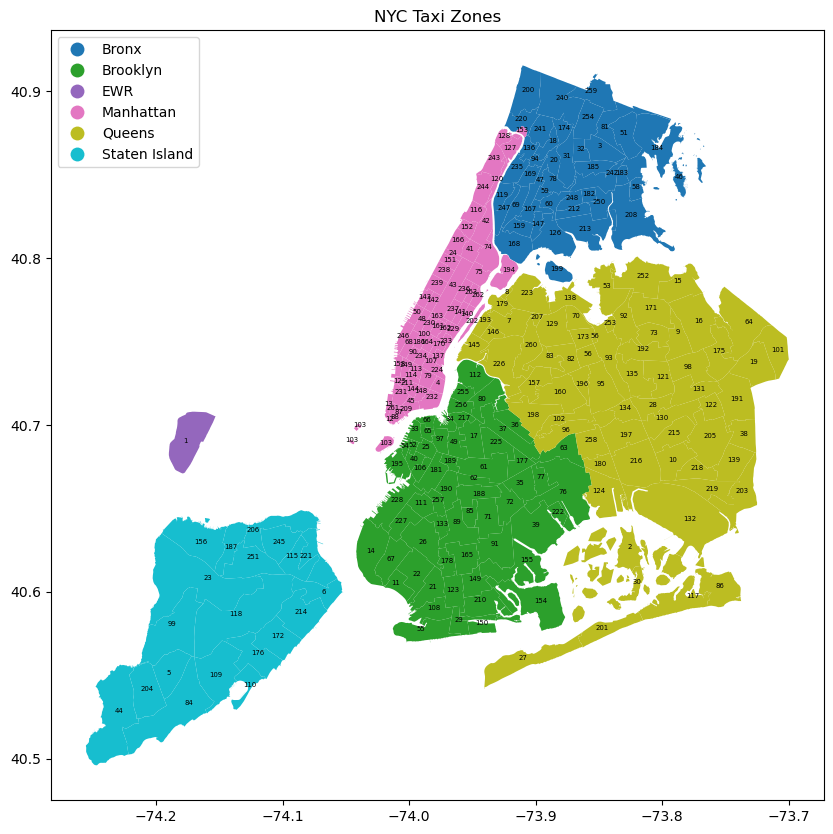

In [5]:
# Plot the shapefile
zones['borough'] = zones['borough'].str.replace('Other', 'Staten Island')
zones.plot(column='borough', figsize=(10, 10), legend=True, legend_kwds={'loc': 'upper left'})  # Plot the zones

# Label each zone with the LocationID
zones['coords'] = zones['geometry'].apply(lambda x: x.representative_point().coords[:])  # Get the coordinates of the zones
zones['coords'] = [coords[0] for coords in zones['coords']]  # Extract the coordinates from the list
for idx, row in zones.iterrows():
    plt.annotate(text=str(row['LocationID']), xy=row['coords'], horizontalalignment='center', fontsize=5)  # Annotate the zones with the LocationID

plt.title('NYC Taxi Zones')
# plt.axis('off')  # Turn off the axis

plt.show()

In [17]:
kaggle2016_train = pd.read_csv('../data/storage/kaggle2016_train.csv')
kaggle2016_test = pd.read_csv('../data/storage/kaggle2016_test.csv')

kaggle2016 = pd.concat([kaggle2016_train, kaggle2016_test])

In [4]:
kaggle2018_train = pd.read_csv('../data/raw_data/kaggle2018_train.csv')
kaggle2018_test = pd.read_csv('../data/raw_data/kaggle2018_test.csv')

kaggle2018 = pd.concat([kaggle2018_train, kaggle2018_test])

In [ ]:
kaggle2018 = kaggle2018.drop(columns=['key'])

In [33]:
kaggle2018['pickup_datetime'] = pd.to_datetime(kaggle2018['pickup_datetime'])

In [1]:
kaggle2018.head()
kaggle2018['pickup_datetime'].min()

NameError: name 'kaggle2018' is not defined

In [35]:
yellow.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,N,140,238,1,21.9,3.50,0.5,6.70,0.0,1.0,33.60,2.5,0.00,NaN
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,N,50,151,1,15.6,3.50,0.5,3.00,0.0,1.0,23.60,2.5,0.00,NaN
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,N,138,97,1,40.8,7.75,0.5,10.00,0.0,1.0,60.05,0.0,1.75,NaN
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,N,100,244,1,39.4,1.00,0.5,8.88,0.0,1.0,53.28,2.5,0.00,NaN
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,N,137,234,1,9.3,1.00,0.5,0.72,0.0,1.0,15.02,2.5,0.00,NaN


In [10]:
# write kaggle 2018 to parquet
kaggle2018.to_parquet('../data/raw_data/2009-2015-yellow.parquet')

In [2]:
kaggle2018_test = pd.read_csv('../data/raw_data/kaggle2018_test.csv')

In [5]:
data1 = pd.read_parquet('../data/processed_data/yellow_processed_from_ids.parquet')
data2 = pd.read_parquet('../data/processed_data/kaggle2018_processed_from_coords.parquet')

In [8]:
len(data1), len(data2)

(76380, 687442)

In [7]:
data2.head()

,H3LocationID,day,time,pickup_count
0,8900286b497ffff,Monday,13:30:00,1
1,89004272537ffff,Tuesday,10:30:00,1
2,8900492c56bffff,Monday,02:30:00,2
3,89005da18dbffff,Thursday,22:00:00,1
4,89005e35aabffff,Saturday,23:00:00,1
